In [1]:
#import pandas as pd
#import numpy as np
#import json
#import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
import string
import sklearn.metrics as metrics


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#from keras.layers import InputLayer, Activation, merge, Concatenate,Input
import os
import datetime
from tensorflow.keras.layers import concatenate
import numpy as np
    
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from keras.layers import Lambda

In [15]:
#read input from historical data into dataframe
data_df = pd.read_excel('/Users/jghosh2/Documents/my-notebook/L1 triage POC/data/Updated-JIRA_DUMP_Mar_2020_March_2022_Sourabh.xlsx',usecols=['Summary','Description','Component'])
data_df['Summary']=data_df['Summary'].astype(str)
data_df['Description']=data_df['Description'].astype(str)
data_df.dropna()
#choose sample data from entire data
data_df = data_df.sample(frac=1, random_state=42)
#data_df['combined_text'] = data_df[['Summary','Description']].apply(lambda x: ' '.join(x[x.notnull()]), axis = 1)
# apply data preprocessing steps on the prepared column
#data_df['processed_text'] = data_df['combined_text'].map(lambda s:preprocess_text(s)) 
data_df.dropna()
print(data_df.shape)
#data_df=data_df.drop_duplicates(subset=['processed_text','Component'],keep='first')
#data_df_duplicated=data_df[data_df.duplicated(subset=['processed_text','target'],keep=False)]
#print(data_df_duplicated.shape)
data_df = data_df.reset_index(drop=True)

(44513, 3)


In [16]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data_df['Component_label']= label_encoder.fit_transform(data_df['Component'])
data_df['Component_label'] = data_df['Component_label'].astype(int)

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_df, test_size = 0.25)

In [18]:
from autoviml.Auto_ViML import Auto_ViML

In [19]:
target = 'Component_label'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (33384, 4)
    Training Set Memory Usage = 1.27 MB
Test Set Shape = (11129, 4)
    Test Set Memory Usage = 0.42 MB
Single_Label Target: ['Component_label']
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 33384 rows, 3 cols
Data Set columns info:
* Summary: 0 nulls, 24276 unique vals, most common: {'Request to Create POs for Another Entity': 611, 'Uber Oracle Concurrent Program Runtime Alert!!': 488}
* Description: 0 nulls, 30555 unique vals, most common: {'nan': 495, 'The following concurrent program output files are attached:\n\n  * Uber EBS Late Termination Audit Report - Request Completed Normal - Uber EBS Late Termination Audit Report.pdf\n\n\nRegards,\n\nOracle System'

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package movie_reviews is a

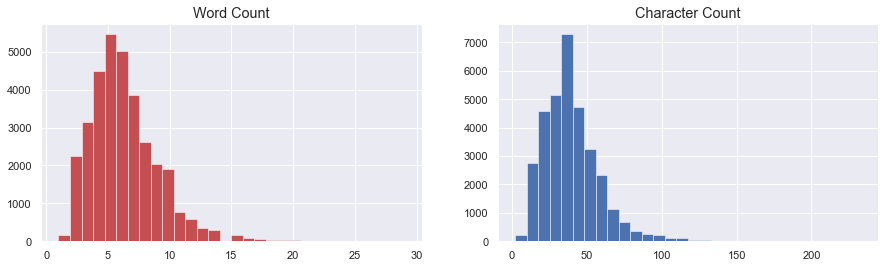

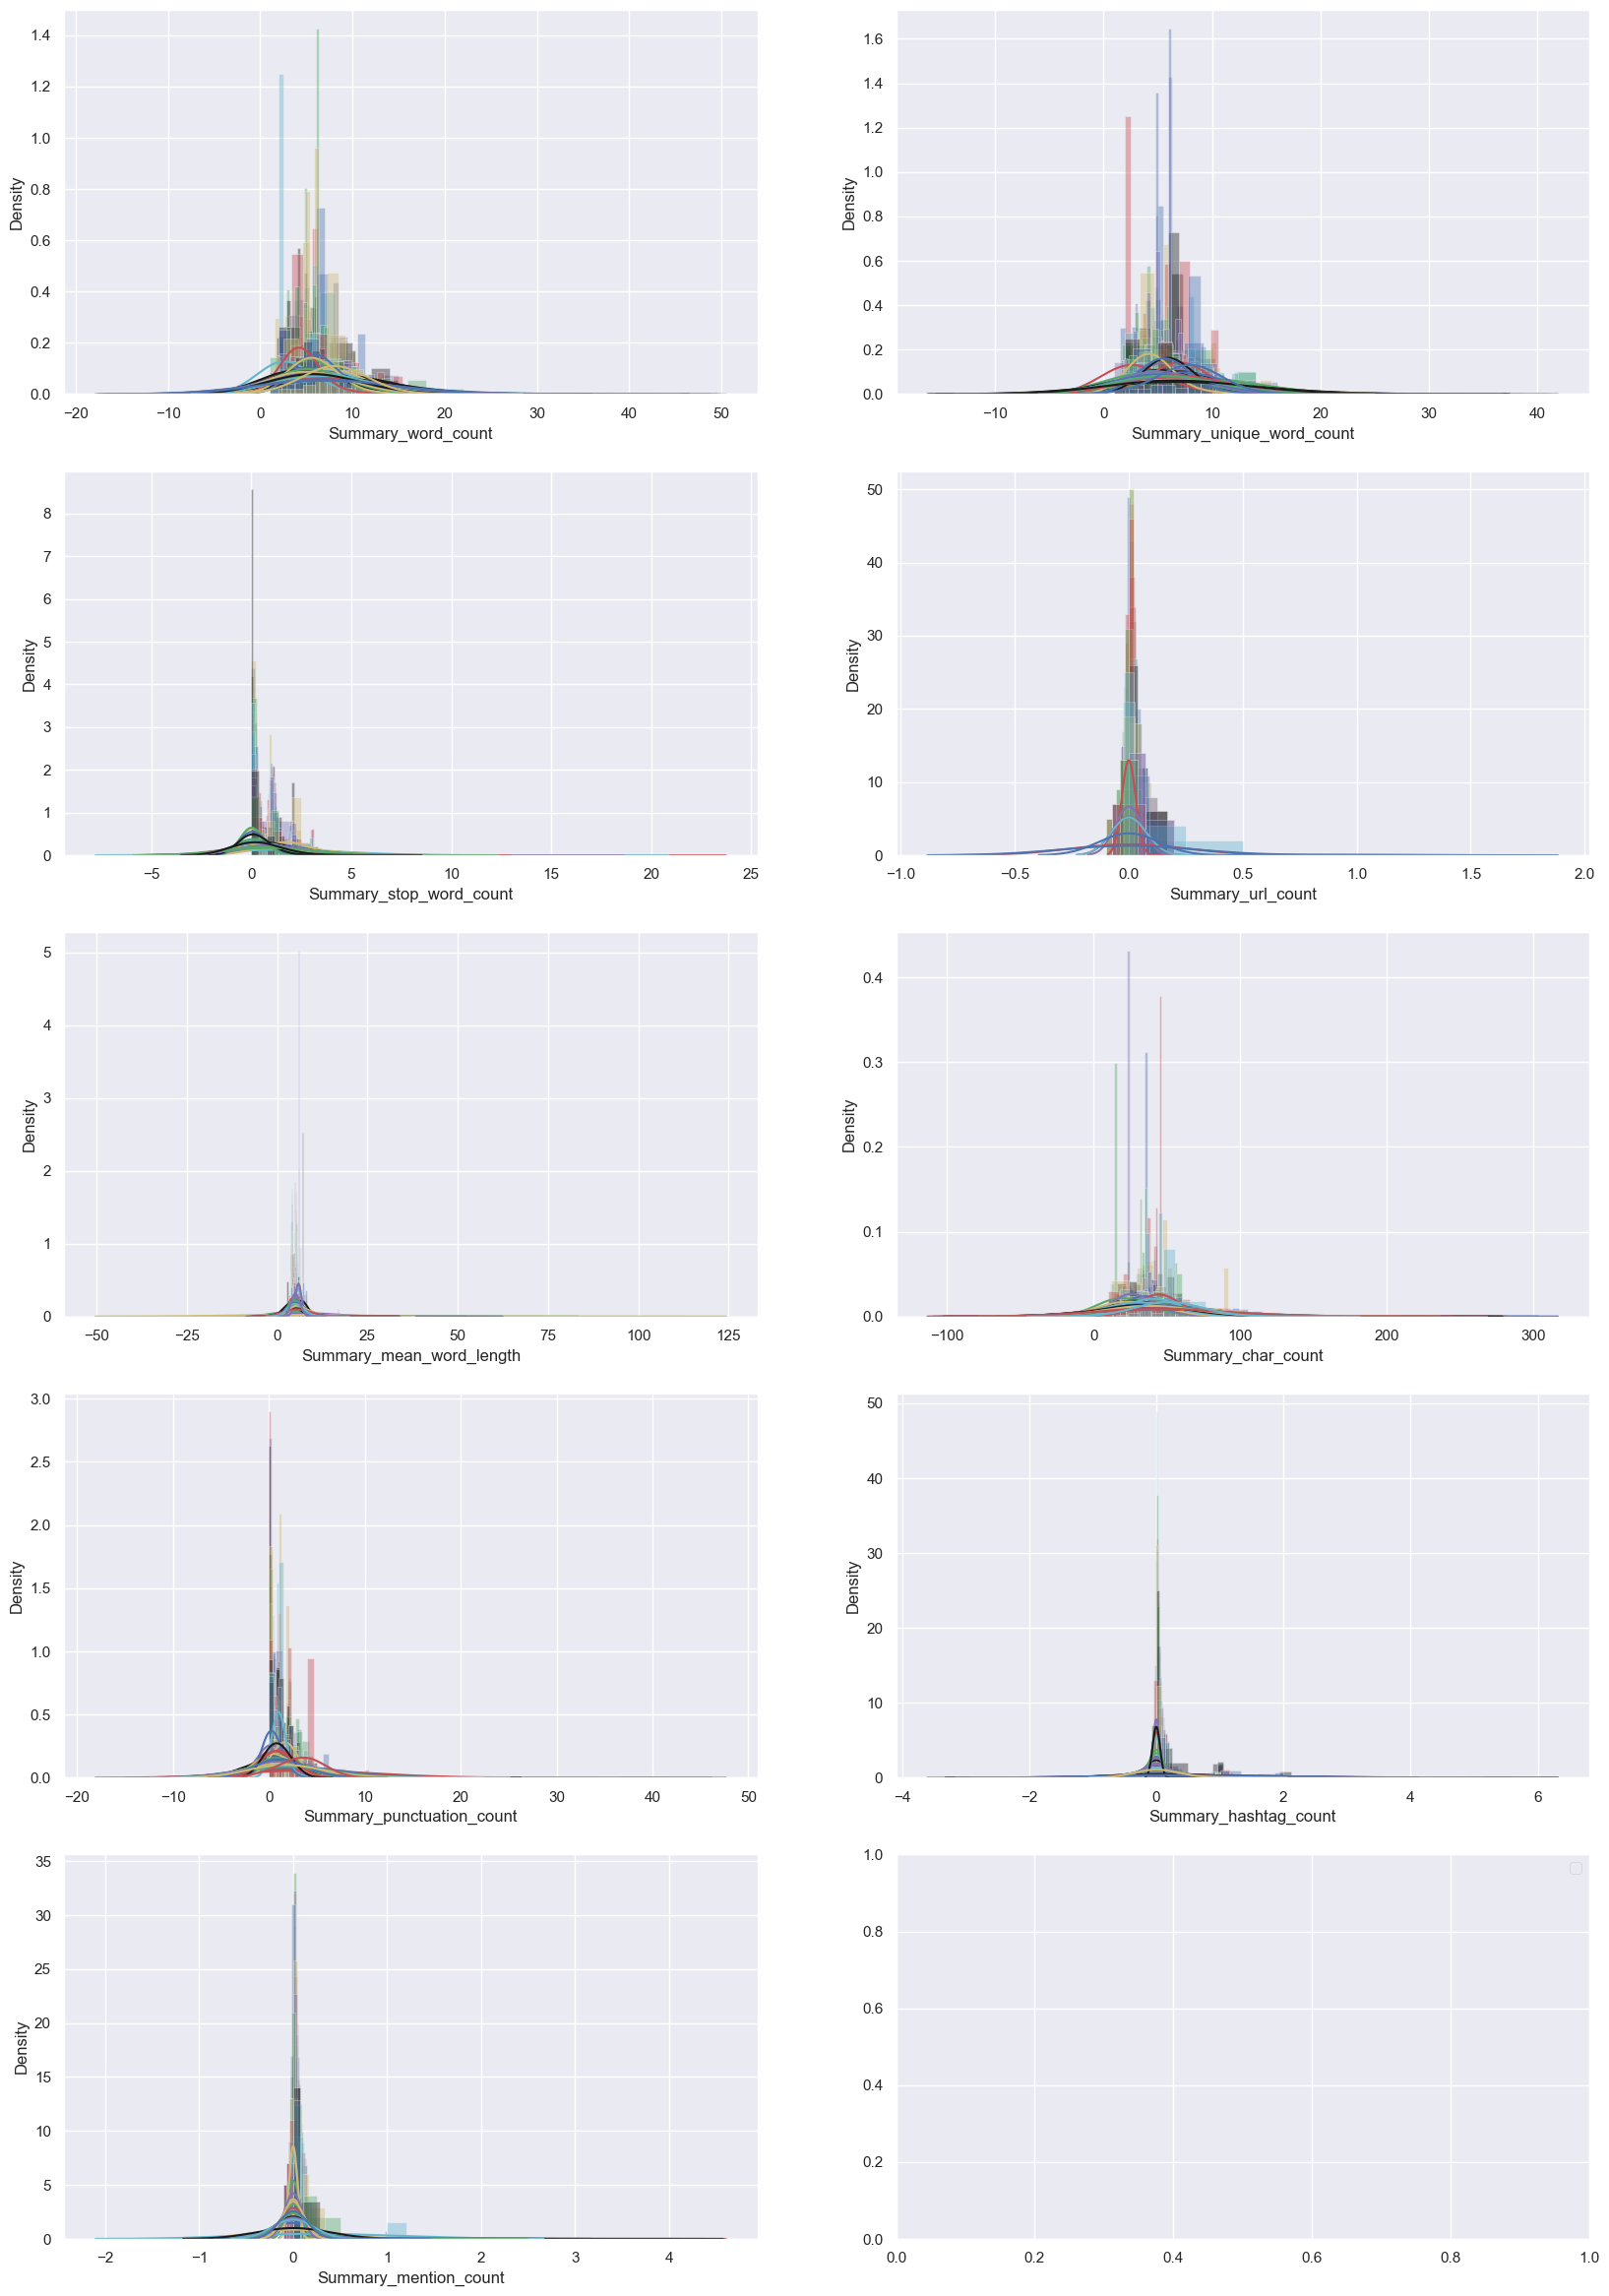

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for Summary column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 5 seconds
        Time Taken for Processing text in data = 30 seconds
Train data Text cleaning completed. Time taken = 57 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = Summary. This will take time...
    Selected the maximum number of features limit = 20104
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (26707,) and Cross Validation data = (6677,)
Since top_num_features = 200, XGBoost Regressor model selected. If you need different model, increase it >= 300.
Auto_NLP error. Continuing without NLP processing
Auto NLP processing on NLP Column: Description
Shape of Trai

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/jghosh2/nltk_data...
[nltk_data]    |   Package movie_reviews is a

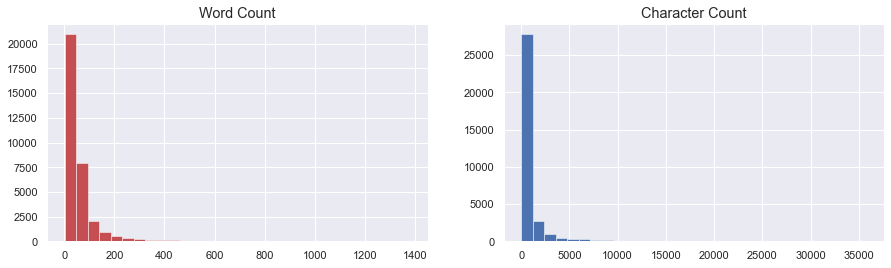

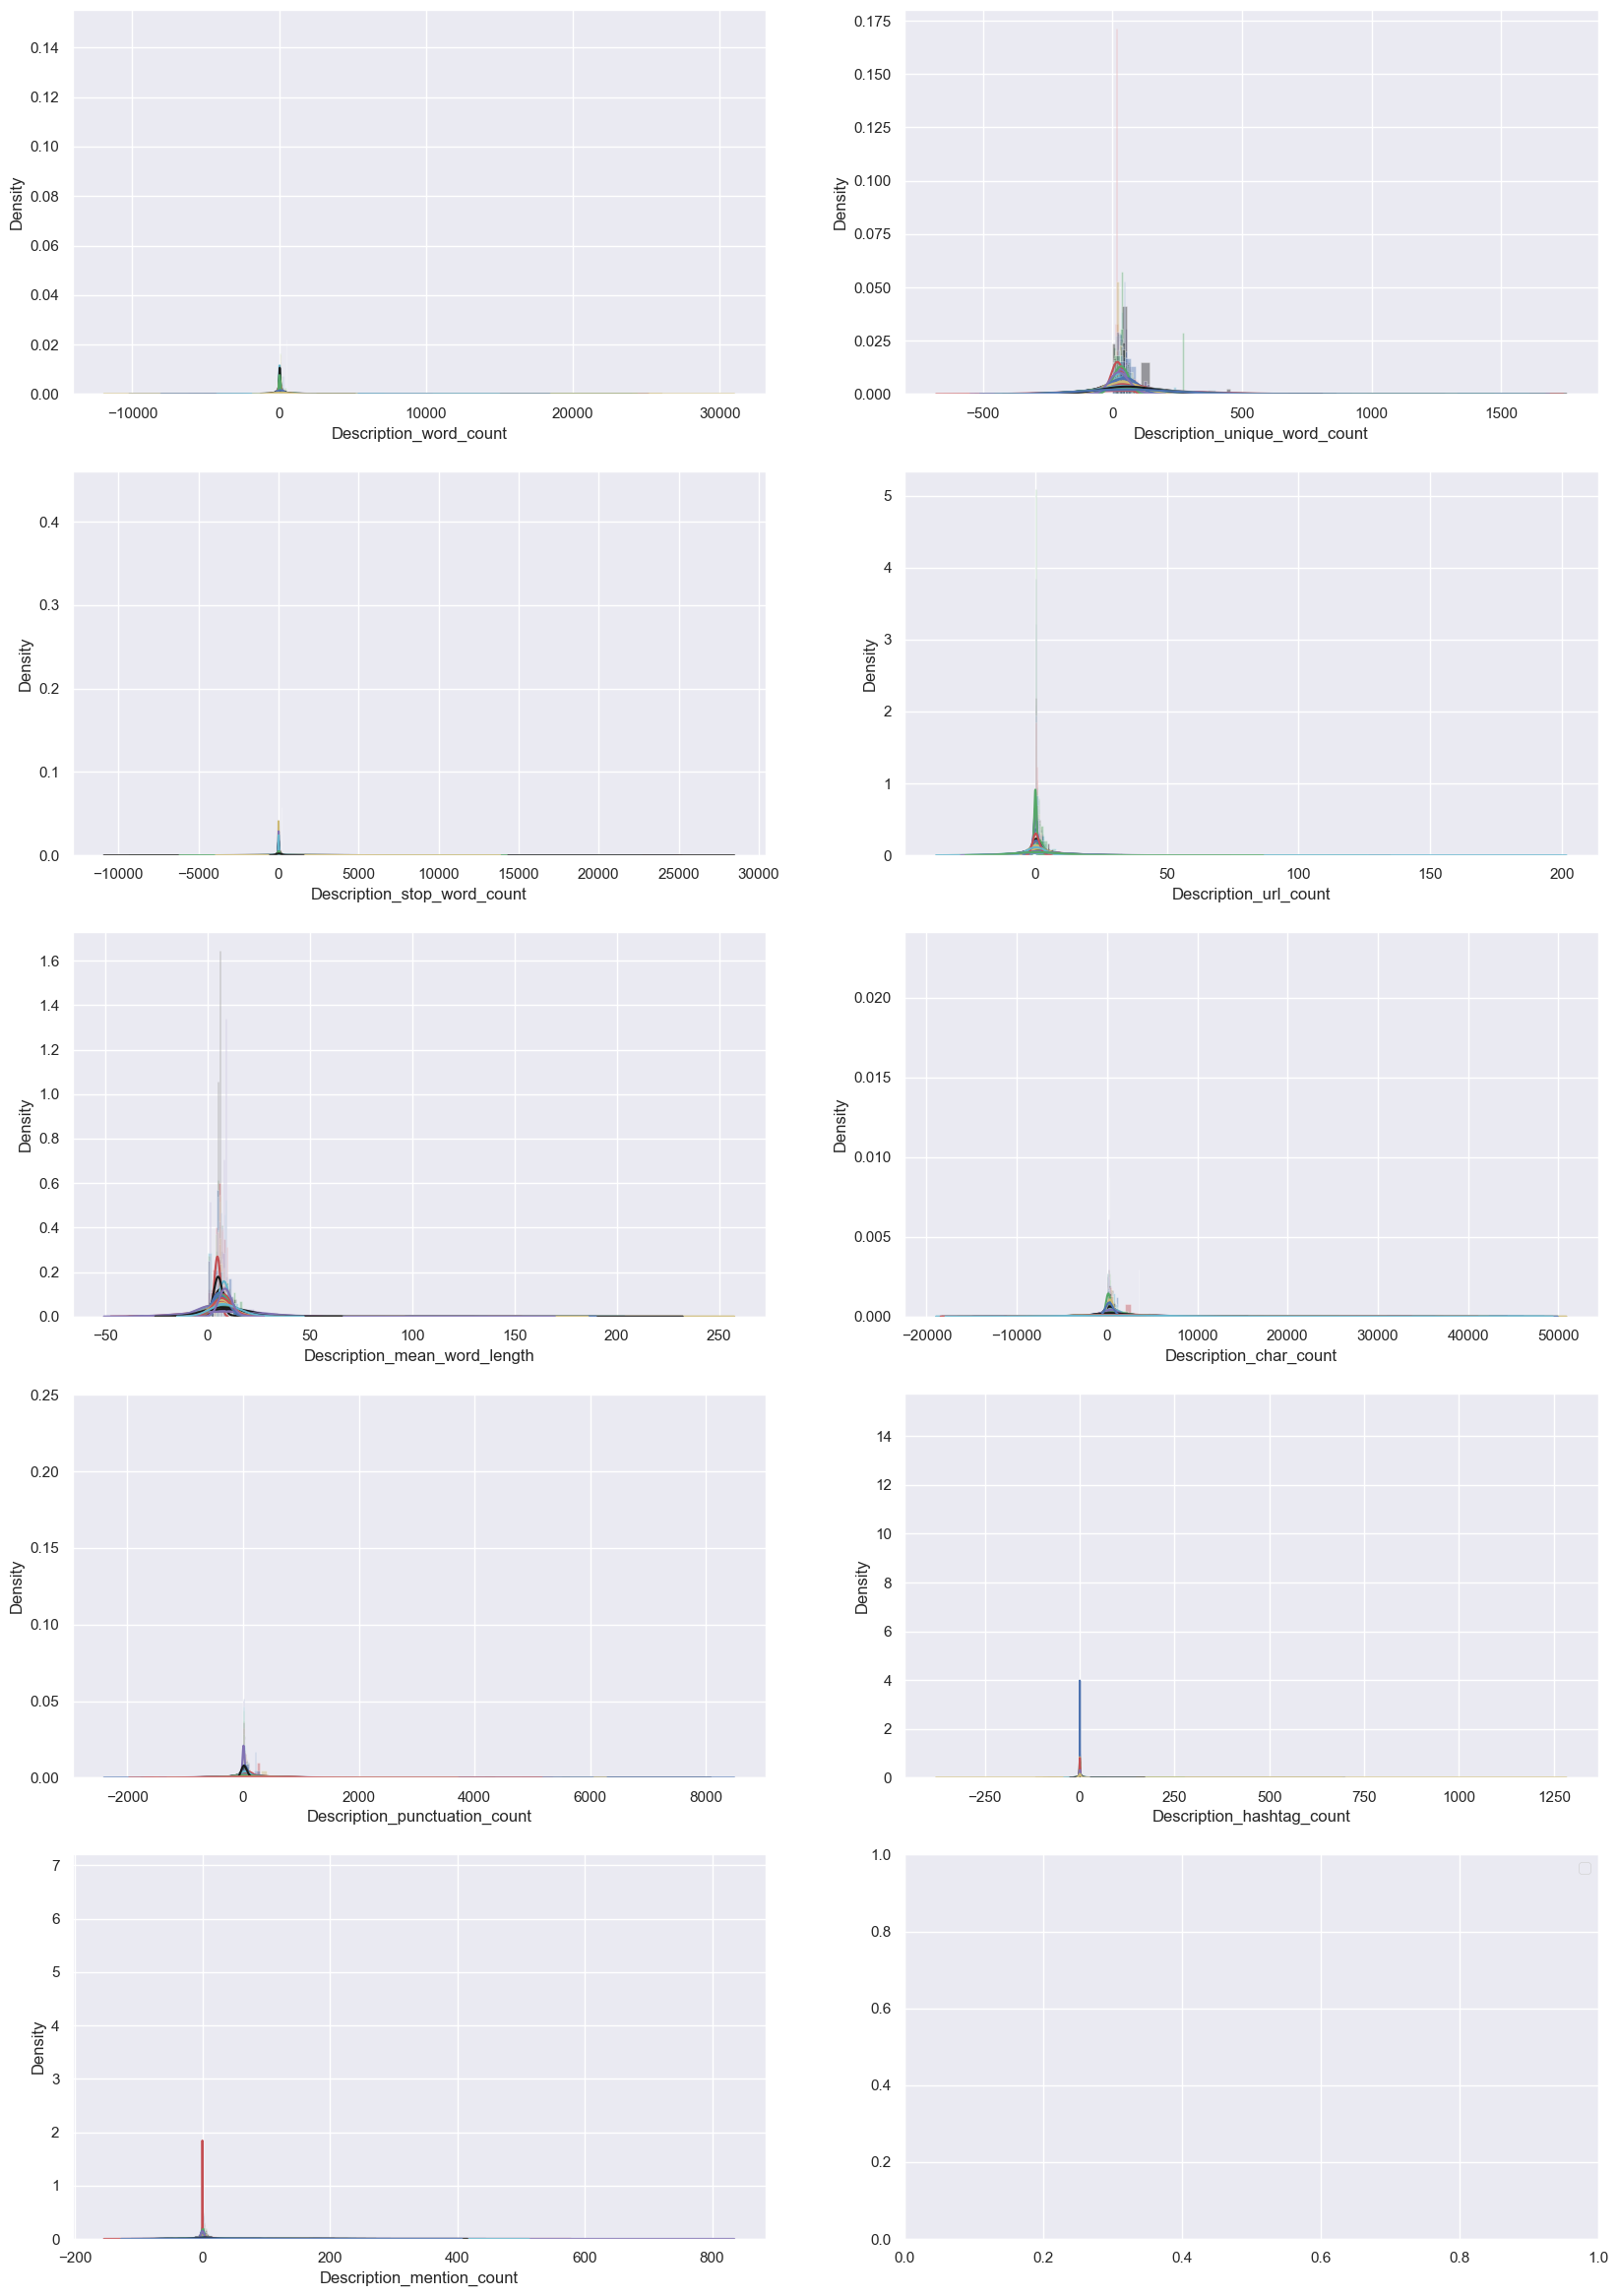

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for Description column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 143 seconds
        Time Taken for Processing text in data = 292 seconds
Train data Text cleaning completed. Time taken = 484 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = Description. This will take time...
    Selected the maximum number of features limit = 289190
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (26707,) and Cross Validation data = (6677,)
Since top_num_features = 200, XGBoost Regressor model selected. If you need different model, increase it >= 300.
Auto_NLP error. Continuing without NLP processing
############# R E M O V I N G   H I G H L Y  C 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.026024
0:	learn: 16.8125792	test: 16.6709899	best: 16.6709899 (0)	total: 5.71ms	remaining: 40s


500:	learn: 1.8613227	test: 1.8428275	best: 1.8428275 (500)	total: 1.12s	remaining: 14.5s
1000:	learn: 0.4734965	test: 0.4677530	best: 0.4677530 (1000)	total: 2.18s	remaining: 13.1s
1500:	learn: 0.1259029	test: 0.1244612	best: 0.1244612 (1500)	total: 3.14s	remaining: 11.5s
2000:	learn: 0.0336042	test: 0.0331946	best: 0.0331946 (2000)	total: 4.06s	remaining: 10.2s
2500:	learn: 0.0089275	test: 0.0088215	best: 0.0088215 (2500)	total: 4.94s	remaining: 8.88s
3000:	learn: 0.0023815	test: 0.0023526	best: 0.0023526 (3000)	total: 5.83s	remaining: 7.78s
3500:	learn: 0.0006350	test: 0.0006273	best: 0.0006273 (3500)	total: 6.7s	remaining: 6.7s
4000:	learn: 0.0001690	test: 0.0001670	best: 0.0001670 (4000)	total: 7.48s	remaining: 5.61s
4500:	learn: 0.0000449	test: 0.0000443	best: 0.0000443 (4500)	total: 8.23s	remaining: 4.57s
5000:	learn: 0.0000120	test: 0.0000118	best: 0.0000118 (5000)	total: 8.95s	remaining: 3.58s
5500:	learn: 0.0000032	test: 0.0000031	best: 0.0000031 (5500)	total: 9.7s	remaining:

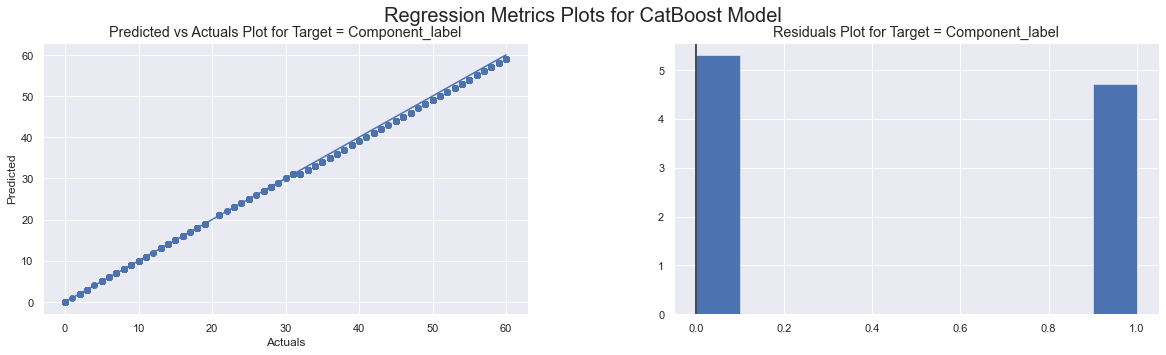

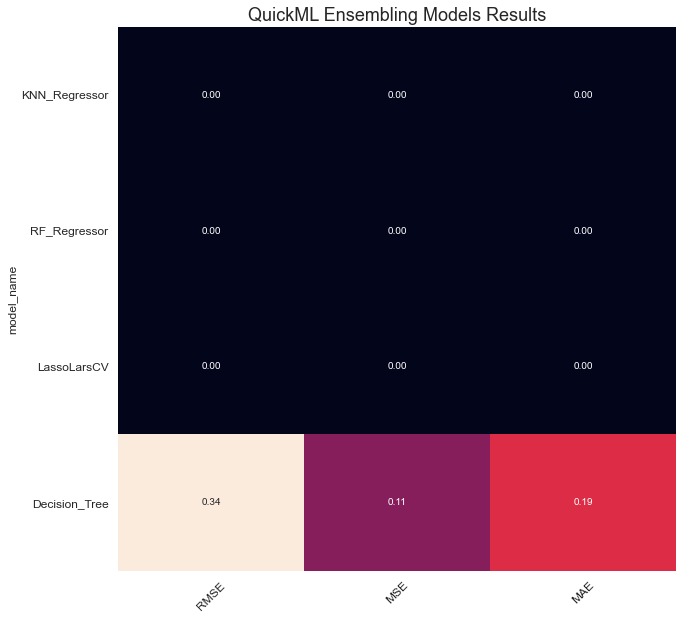

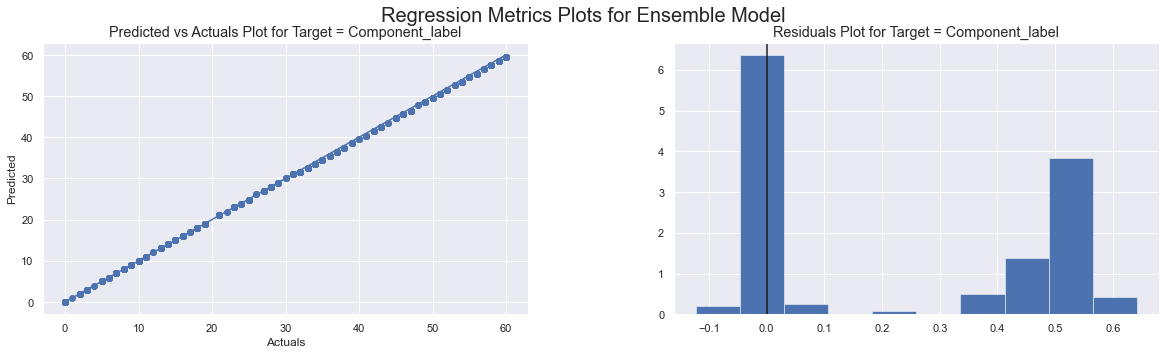

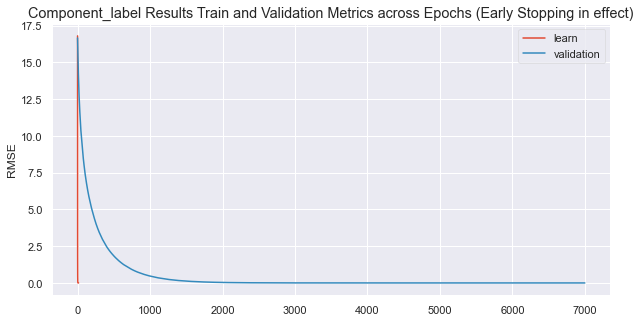

    Time taken for this Target (in seconds) = 3048
    Binning_Flag set to False or there are no float vars in data set to be binned
    Setting best params for CatBoost model from Initial State since you cannot change params to a fitted Catboost model 
    Number of Categorical and Integer variables used in CatBoost training = 1
No MinMax scaling performed since scaling flag is set to false
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
0:	learn: 16.7799524	total: 2.19ms	remaining: 15.3s
500:	learn: 1.8423220	total: 762ms	remaining: 9.88s
1000:	learn: 0.4630011	total: 1.51s	remaining: 9.08s
1500:	learn: 0.1220393	total: 2.3s	remaining: 8.44s
2000:	learn: 0.0322099	total: 3.13s	remaining: 7.82s
2500:	learn: 0.0084685	total: 3.89s	remaining: 6.99s
3000:	learn: 0.0022322	total: 4.67s	remaining: 6.23s
3500:	learn: 0.0005876	total: 5.43s	remaining: 5.43s
4000:	learn: 0.0001547	total: 6.22s	remaining: 4.66s
4500:	learn: 0.0000407	total: 7.05s	remain

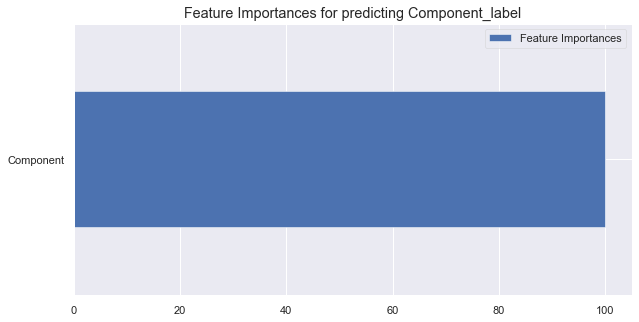

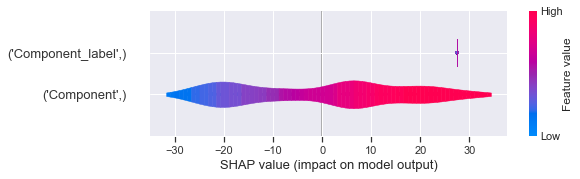

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 3063
Writing Output files to disk...
    Saving predictions to ./Component_label/Component_label_Regression_test_modified.csv
    Saving predictions to ./Component_label/Component_label_Regression_submission.csv
    Saving predictions to ./Component_label/Component_label_Regression_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 51.1 for the Entire Process


In [20]:
m, feats, trainm, testm = Auto_ViML(train, target, test,
                                    sample_submission = '',
                                    scoring_parameter = '', KMeans_Featurizer = False,
                                    hyper_param = 'RS', feature_reduction = True,
                                    Boosting_Flag = 'CatBoost', Binning_Flag = False,
                                    Add_Poly = 0, Stacking_Flag = False, Imbalanced_Flag = False,
                                    verbose = 2)

In [21]:
m.save_model('model', format = 'cbm')
m.predict(testm[feats])

array([42.99999997, 42.99999997, 55.99999993, ..., 46.99999995,
       35.99999997, 49.99999998])

In [23]:
from autoviml.Auto_NLP import plot_confusion_matrix,plot_classification_matrix
plot_confusion_matrix(test[target].values,m.predict(testm[feats]))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets